## 라이브러리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun GOthic')
plt.rcParams['font.family']

import warnings
warnings.filterwarnings('ignore')

## 데이터 읽기

In [1]:
import pandas as pd
import os
display(os.listdir('./origin'))

df_consult = pd.read_excel('./origin/공정거래위원회_소비자 민원학습데이터 온라인 상거래 소비자상담 내역_20201231.xlsx')
df_consult_sheet = pd.ExcelFile('./origin/공정거래위원회_소비자 민원학습데이터 온라인 상거래 소비자상담 내역_20201231.xlsx').sheet_names
for sheet in df_consult_sheet:
    print("df_consult_sheet_name", sheet)
    
df_health = pd.read_excel('./origin/한국건강증진개발원_보건소 모바일 헬스케어_미션_20230912.xlsx')
df_health_sheet = pd.ExcelFile('./origin/한국건강증진개발원_보건소 모바일 헬스케어_미션_20230912.xlsx').sheet_names
for sheet in df_health_sheet:
    print("df_health_sheet_name", sheet)
    
df_meal = pd.read_excel('./origin/한국건강증진개발원_보건소 모바일 헬스케어_식사_20230909.xlsx')
df_meal_sheet = pd.ExcelFile('./origin/한국건강증진개발원_보건소 모바일 헬스케어_식사_20230909.xlsx').sheet_names
for sheet in df_meal_sheet:
    print("df_meal_sheet_name", sheet)

df_activity = pd.read_excel('./origin/한국건강증진개발원_보건소 모바일 헬스케어_활동_20230912.xlsx')
df_activity_sheet = pd.ExcelFile('./origin/한국건강증진개발원_보건소 모바일 헬스케어_활동_20230912.xlsx').sheet_names
for sheet in df_activity_sheet:
    print("df_exercise_sheet_name", sheet)

['공정거래위원회_소비자 민원학습데이터 온라인 상거래 소비자상담 내역_20201231.xlsx',
 '한국건강증진개발원_보건소 모바일 헬스케어_미션_20230912.xlsx',
 '한국건강증진개발원_보건소 모바일 헬스케어_식사_20230909.xlsx',
 '한국건강증진개발원_보건소 모바일 헬스케어_활동_20230912.xlsx']

df_consult_sheet_name 공정거래위원회_소비자 민원학습데이터 온라인 상거래 소비자
df_health_sheet_name 한국건강증진개발원_보건소 모바일 헬스케어_미션_20230
df_meal_sheet_name 한국건강증진개발원_보건소 모바일 헬스케어_식사_20230
df_exercise_sheet_name 한국건강증진개발원_보건소 모바일 헬스케어_활동_20230


In [2]:
display(pd.concat([df_consult['성별코드(GENDER_CODE)'], df_consult['성별(GENDER)']], axis=1).notna().sum())
display(pd.concat([df_consult['성별코드(GENDER_CODE)'], df_consult['성별(GENDER)']], axis=1).isna().sum())

성별코드(GENDER_CODE)    477613
성별(GENDER)           477613
dtype: int64

성별코드(GENDER_CODE)    259193
성별(GENDER)           259193
dtype: int64

## 1. 공정거래위원회_소비자 민원학습데이터 온라인 상거래 소비자상담 내역_20201231.xlsx

In [3]:
display(df_consult.shape)
display(df_consult.head())

# display(df_consult.columns)

## 성별
df_consult_gender = pd.concat([df_consult['성별코드(GENDER_CODE)'], df_consult['성별(GENDER)']], axis=1)
display(df_consult_gender.head())

## 연령
df_consult_age = pd.concat([df_consult['연령대코드(AGE_GROUP_CODE)'], df_consult['연령대(AGE_GROUP_NAME)']], axis=1)
display(df_consult_age.head())

## 지역
df_consult_region = pd.concat([df_consult['지역코드(AREA_CODE)'], df_consult['지역명(AREA_NAME)']], axis=1)
display(df_consult_region.head())

## 품목
df_consult_items = pd.concat([df_consult['품목코드(ITEM_CODE)'], df_consult['품목명(ITEM_NAME)']], axis=1)
display(df_consult_items.head())

## 처리
df_consult_case = pd.concat([ df_consult['사건번호(ACCIDENT_NO)'], df_consult['사건제목(ACCIDENT_TITLE)'], df_consult['처리결과코드(PRCS_RESULT_CODE)'], df_consult['처리결과(PRCS_RESULT)']], axis=1)
display(df_consult_case.head())

(736806, 13)

,사건번호(ACCIDENT_NO),접수일자(RCPT_YMD),성별코드(GENDER_CODE),성별(GENDER),연령대코드(AGE_GROUP_CODE),연령대(AGE_GROUP_NAME),지역코드(AREA_CODE),지역명(AREA_NAME),품목코드(ITEM_CODE),품목명(ITEM_NAME),사건제목(ACCIDENT_TITLE),처리결과코드(PRCS_RESULT_CODE),처리결과(PRCS_RESULT)
0,2020-0000005,2020-01-01,2.0,여성,5.0,40 - 49세,1403,구미시,350104,항공여객운송서비스,마일리지 사용 제한,502,법.제도설명
1,2020-0000045,2020-01-01,2.0,여성,3.0,20 - 29세,405,부평구,230601,애완견,애초에 계약금도 말도안되었고 계약위반했는데 말에 꼬리에엮고 계약서쓴것도없고 돈 환불...,527,피해구제접수안내
2,2020-0000073,2020-01-01,1.0,남성,5.0,40 - 49세,805,군포시,370499,기타회원권,TLX 패스 이용권,509,기타정보제공
3,2020-0000006,2020-01-01,2.0,여성,6.0,50 - 59세,801,고양시,210201,퍼스널컴퓨터,고지없이 정품 아닌 회사용 윈도우 설치된 회사용 컴 교체후 불편함과 고객센타의 불만...,527,피해구제접수안내
4,2020-0000002,2020-01-01,2.0,여성,4.0,30 - 39세,123,종로구,170402,유아복,(주)씨제이이엠에서 환불을 해주고 있지 않습니다.,527,피해구제접수안내


,성별코드(GENDER_CODE),성별(GENDER)
0,2.0,여성
1,2.0,여성
2,1.0,남성
3,2.0,여성
4,2.0,여성


,연령대코드(AGE_GROUP_CODE),연령대(AGE_GROUP_NAME)
0,5.0,40 - 49세
1,3.0,20 - 29세
2,5.0,40 - 49세
3,6.0,50 - 59세
4,4.0,30 - 39세


,지역코드(AREA_CODE),지역명(AREA_NAME)
0,1403,구미시
1,405,부평구
2,805,군포시
3,801,고양시
4,123,종로구


,품목코드(ITEM_CODE),품목명(ITEM_NAME)
0,350104,항공여객운송서비스
1,230601,애완견
2,370499,기타회원권
3,210201,퍼스널컴퓨터
4,170402,유아복


,사건번호(ACCIDENT_NO),사건제목(ACCIDENT_TITLE),처리결과코드(PRCS_RESULT_CODE),처리결과(PRCS_RESULT)
0,2020-0000005,마일리지 사용 제한,502,법.제도설명
1,2020-0000045,애초에 계약금도 말도안되었고 계약위반했는데 말에 꼬리에엮고 계약서쓴것도없고 돈 환불...,527,피해구제접수안내
2,2020-0000073,TLX 패스 이용권,509,기타정보제공
3,2020-0000006,고지없이 정품 아닌 회사용 윈도우 설치된 회사용 컴 교체후 불편함과 고객센타의 불만...,527,피해구제접수안내
4,2020-0000002,(주)씨제이이엠에서 환불을 해주고 있지 않습니다.,527,피해구제접수안내


In [4]:
df_consult_case['처리결과(PRCS_RESULT)'].value_counts().to_frame()

,count
처리결과(PRCS_RESULT),
기타정보제공,146331
분쟁해결기준설명,124160
피해구제접수안내,100581
법.제도설명,96013
환급,66814
합의불성립,50598
계약이행,20214
상품정보제공,17998
시장정보제공,16851


In [10]:
# display(list(df_consult_case['사건제목(ACCIDENT_TITLE)'].values))

# 데이터프레임에서 문자열을 추출하여 단일 문자열로 결합
word_sentence = " ".join(df_consult_case['사건제목(ACCIDENT_TITLE)'].astype(str).values)

# print(word_sentence)

# 특정 단어들을 치환하는 함수
def replace_words(text, replacements):
    for old_word, new_word in replacements.items():
        text = text.replace(old_word, new_word)
    return text

# 치환할 단어들 딕셔너리
replacements = {
    
    '로봇대회 참가 등록비 환급 요청' : '환급요청',
    
    '뮤지컬 공연시작후 환급요구시 환급 거부' : '환급거부',
    
    '상품불만으로 인한 환불조치 요청 불응' : '환불요청불응',
    
    '온라인구매 안마의자 보증기간이내 수리불가하여 전액 환불요청' : '환불요청',
    '청소 의뢰 후에  청소가 잘못되어서 일부 환불 요청 건' : '환불요청',
    '호텔  이용날자 오입력으로 날자변경  또는 환불 요청 건' : '환불요청',
    '배송이 지연되는 자두에 대한 환불 요구' : '환불요청',
    '표시광고와 다른 의류에 대한 환불 요구' : '환불요청',
    
    '환불을 요청했는데 지연되고 있음' : '환불지연',
    
    '모바일 소액결제  환불요구 문의' : '환불문의',
    '수술로 취소하게된 해외여행 계약 환불 문의' : '환불문의',
    
    '여기어때 앱 환불규정 너무 불합리해요' : '환불규정불만',
    
    
    '소비자 스크레치로 인한 교환 문의' : '교환문의',
    
    '모바일어플 아이템 환불 지연' : '환불지연',
    
    '구매한 의류 배송지연 상담건' : '배송지연',
    
    '매트리스만배송되어프레임미배송으로불만' : '배송불만',
    
    '수박먹고 배탈이 난 것에 대한 보상 문의' : '보상문의',
    
    '구매한 식탁에 대해 개인사정으로 인해 구매 취소시 발생하는 위약금 문의' : '위약금문의',
    
    '고글구입후 연락두절업체 신고' : '연락두절업체',
    
    '반품 신청한 바지 처리 지연 피해' : '처리지연',
    
    '뇌새김 영어 교재 반품 요청' : '반품문의',
    '해외구매대행 운동화 반품 문의' : '반품문의',
    '옷을 구입을 하고 난후 반품요구함' : '반품문의',
    '사이즈 상담 후 구매한 코트 사이즈 커 무상으로 반품 요구' : '반품문의',
    
    '인터넷 상거래에서 원가이하세일품목이라는 이유로 반품을 거절한 경우' : '반품거절',
    '전자상거래법에 따라 7일이내 반품의사 표시거절' : '반품거절',
    
    '인터넷으로구매한 전기온수기 설치하려고보니찍힘' : '제품불량',
    '쌀에서 까만벌레발견으로 보상건' : '제품불량',
    '의류제품 불량으로 인한 반품요청' : '제품불량',
    '1개월전 구매한 가습기에서 나는 냄새' : '제품불량',
    
    '대행사의 사기를 신고합니다.' : '사기',
    
    '호텔스 닷컴 예약후 리워즈 적립요구' : '적립요구',
}

# 사건제목(ACCIDENT_TITLE) 열의 단어를 치환
df_consult_case['사건제목(ACCIDENT_TITLE)'] = df_consult_case['사건제목(ACCIDENT_TITLE)'].astype(str).apply(replace_words, replacements=replacements)

# 치환된 값을 기반으로 value_counts() 수행
title_counts = df_consult_case['사건제목(ACCIDENT_TITLE)'].value_counts()

# 결과 출력
# display(title_counts.sort_values(ascending=True).to_frame().head(25))
display(title_counts.sort_values(ascending=False).to_frame().head(20))

# 텍스트 파일로 저장
with open('./wordCloud/word_sentence.txt', 'w', encoding='utf-8') as file:
    file.write(word_sentence)

,count
사건제목(ACCIDENT_TITLE),
레몬트리)옷 주문 후 배송지연으로 환불 요청,679
[포털][카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],634
[포탈][카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],451
환불,329
[카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],326
레몬트리) 의류주문 후 미배송에 따른 환불 지연,282
레몬트리 날마다신상 계약불이행,274
레몬트리) 의류 주문 후 배송 지연으로 환불 요청,270
안녕하세요,215


In [6]:
# 텍스트 파일로 저장
# with open('./wordCloud/word_sentence.txt', 'w', encoding='utf-8') as file:
#     file.write(word_sentence)
    
# 텍스트 파일 읽기
with open('./wordCloud/word_sentence.txt', 'r', encoding='utf-8') as file:
    read_word_sentence = file.read()

# print(read_word_sentence)

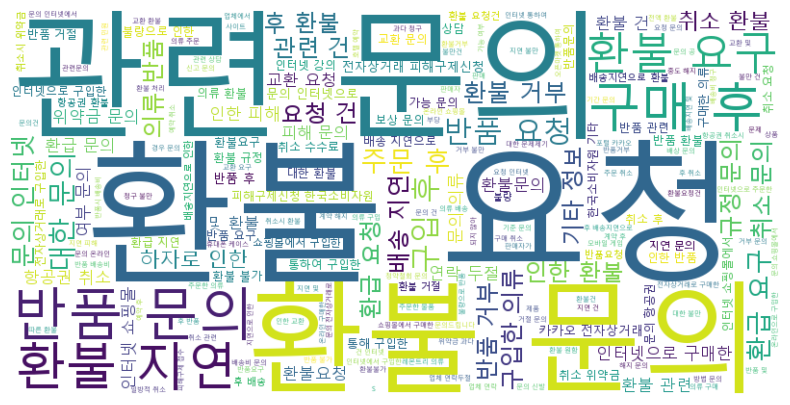

In [9]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun GOthic')
plt.rcParams['font.family']

# 불용어 리스트
stopwords = ['의', '가', '이', '은', '는', '을', '를', '에', '와', '한', '하다']

# 불용어 제거 함수
def remove_stopwords(text, stopwords):
    pattern = re.compile(r'\b(' + '|'.join(stopwords) + r')\b\s*')
    return pattern.sub('', text)

# 불용어 제거
cleaned_text = remove_stopwords(read_word_sentence, stopwords)

# display(cleaned_text)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='malgun', width=800, height=400, background_color='white').generate(cleaned_text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
import pandas as pd

# 정제된 텍스트를 데이터프레임으로 변환
data = {'cleaned_text': [cleaned_text]}
df = pd.DataFrame(data)

# 데이터프레임 표시
print(df)

                                        cleaned_text
0  마일리지 사용 제한 애초에 계약금도 말도안되었고 계약위반했는데 말에 꼬리에엮고 계약...


## 2. 한국건강증진개발원_보건소 모바일 헬스케어_미션_20230912.xlsx

In [17]:
display(df_health.head())
display(df_health.columns)
df_health['미션명'].value_counts().to_frame()

display(df_health.shape)
display(df_health['미션수행일'].max())
display(df_health['미션수행일'].min())

display(df_health['미션명'].value_counts().to_frame().reset_index())

,입력번호,미션명,미션수행일,미션점수
0,40673043,신체활동) 운동일기 등록,2023-09-12,1
1,40673044,활동량) 활동량계 업데이트,2023-09-12,1
2,40673045,영양) 식사일기 등록,2023-09-12,1
3,40673522,영양) 식사일기 등록,2023-09-12,1
4,40673523,영양) 식사일기 등록,2023-09-12,1


Index(['입력번호', '미션명', '미션수행일', '미션점수'], dtype='object')

(5000, 4)

Timestamp('2023-09-12 00:00:00')

Timestamp('2023-09-11 00:00:00')

,미션명,count
0,활동량) 활동량계 업데이트,1109
1,영양) 식생활 미션 실천여부 확인,990
2,SNS) 게시판 댓글 달기,902
3,영양) 식사일기 등록,811
4,신체활동) 운동일기 등록,716
5,모바일 건강상담) 월간리포트(건강집중상담) 확인,193
6,모바일 건강상담) 신체활동 집중상담 확인,130
7,모바일 건강상담) 영양 집중상담 확인,85
8,영양) 식사사진 등록,64


- "모바일 건강상담) 영양 집중상담 확인", "영양) 식사사진 등록"은 항목들 중에서 유일하게 두 자리수로 집계되어 매우 낮은 모습  

- "활동량) 활동량계 업데이트"는 목록 중에서 유일하게 천 단위로 매우 높은 모습을 보임

## 3. 한국건강증진개발원_보건소 모바일 헬스케어_식사_20230912.xlsx

In [81]:
display(df_meal.head())
display(df_meal.columns)

display(df_meal.shape)
display(df_meal['식사일시'].max())
display(df_meal['식사일시'].min())

,식사일시,칼로리,끼니구분
0,2023-09-09,215.40,점심
1,2023-09-09,271.05,점심
2,2023-09-09,228.01,점심
3,2023-09-09,98.93,점심
4,2023-09-09,15.00,점심


Index(['식사일시', '칼로리', '끼니구분'], dtype='object')

(30000, 3)

Timestamp('2023-09-09 00:00:00')

Timestamp('2023-09-01 00:00:00')

## 4. 한국건강증진개발원_보건소 모바일 헬스케어_식사_20230912.xlsx

In [84]:
# display(df_activity.head())
display(df_activity.columns)
display(df_activity.shape)

df_activity['최종_수정_일시_연도'] = df_activity['최종_수정_일시'].dt.year
df_activity['최종_수정_일시_연도_월'] = df_activity['최종_수정_일시'].dt.strftime('%Y-%m')

display(df_activity)
display(df_activity['최종_수정_일시'].max())
display(df_activity['최종_수정_일시'].min())

df_activity_numeric = df_activity[['최종_수정_일시', '최종_수정_일시_연도', '최종_수정_일시_연도_월', '안전_목표_심박수', '상담_차수', '하루활동칼로리', '하루활동시간', '활동유효한계']]
df_activity_numeric

Index(['상담_순번', '안전_목표_심박수', '최종_수정_일시', '상담_차수', '활동_처방_구분', '하루활동칼로리',
       '하루활동시간', '활동유효한계', '최종_수정_일시_연도', '최종_수정_일시_연도_월'],
      dtype='object')

(4234, 10)

,상담_순번,안전_목표_심박수,최종_수정_일시,상담_차수,활동_처방_구분,하루활동칼로리,하루활동시간,활동유효한계,최종_수정_일시_연도,최종_수정_일시_연도_월
0,7245111,144,2023-09-12,3,설문,230,30,50,2023,2023-09
1,7476478,137,2023-09-12,1,설문,357,43,60,2023,2023-09
2,6282740,139,2023-09-12,6,설문,450,65,65,2023,2023-09
3,7314038,141,2023-09-12,3,설문,370,73,65,2023,2023-09
4,6364313,123,2023-09-12,6,설문,334,43,60,2023,2023-09
...,...,...,...,...,...,...,...,...,...,...
4229,7055425,109,2023-09-01,3,설문,144,30,60,2023,2023-09
4230,7086745,131,2023-09-01,3,설문,227,48,60,2023,2023-09
4231,7123032,130,2023-09-01,3,설문,302,48,60,2023,2023-09
4232,7065612,117,2023-09-01,3,설문,208,48,60,2023,2023-09


Timestamp('2023-09-12 00:00:00')

Timestamp('2023-09-01 00:00:00')

,최종_수정_일시,최종_수정_일시_연도,최종_수정_일시_연도_월,안전_목표_심박수,상담_차수,하루활동칼로리,하루활동시간,활동유효한계
0,2023-09-12,2023,2023-09,144,3,230,30,50
1,2023-09-12,2023,2023-09,137,1,357,43,60
2,2023-09-12,2023,2023-09,139,6,450,65,65
3,2023-09-12,2023,2023-09,141,3,370,73,65
4,2023-09-12,2023,2023-09,123,6,334,43,60
...,...,...,...,...,...,...,...,...
4229,2023-09-01,2023,2023-09,109,3,144,30,60
4230,2023-09-01,2023,2023-09,131,3,227,48,60
4231,2023-09-01,2023,2023-09,130,3,302,48,60
4232,2023-09-01,2023,2023-09,117,3,208,48,60


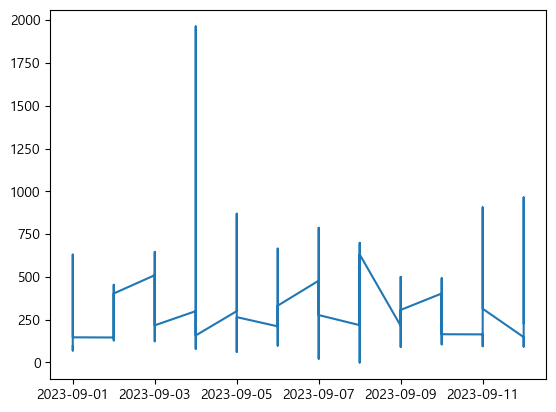

In [68]:
display()

plt.plot(df_activity_numeric['최종_수정_일시'], df_activity_numeric['하루활동칼로리'])